### Load Libraries

In [2]:
# Load Libraries



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


### Importing dataset

In [3]:
# Load the data set 

BC_data = pd.read_csv('Breast_cancer_recurrence_data_set.csv')
BC_data

#dataset
#X = BC_data.iloc[:, :-1].values
#y = BC_data.iloc[:, -1].values
#X
#y

,id,diagnosis,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,Lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [4]:
BC_data.shape

(198, 35)

In [5]:
BC_data.describe()

,id,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076578,1.500000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [6]:
BC_data.diagnosis.unique()

array(['N', 'R'], dtype=object)

In [7]:
BC_data['diagnosis'].value_counts()

N    151
R     47
Name: diagnosis, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

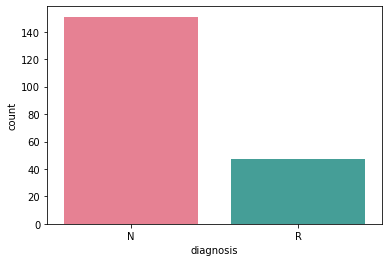

In [8]:
sns.countplot(BC_data['diagnosis'], palette ='husl')


#### Encoding
##### converting the values of N and R into 1 and 0

In [ ]:
#Encoding 
BC_data['diagnosis'] = BC_data['diagnosis'].map({'N':0, 'R':1})
BC_data

#### a univariate distribution plot is drawn to show the marginal distribution of the data in each column. against the target variable diagnosis

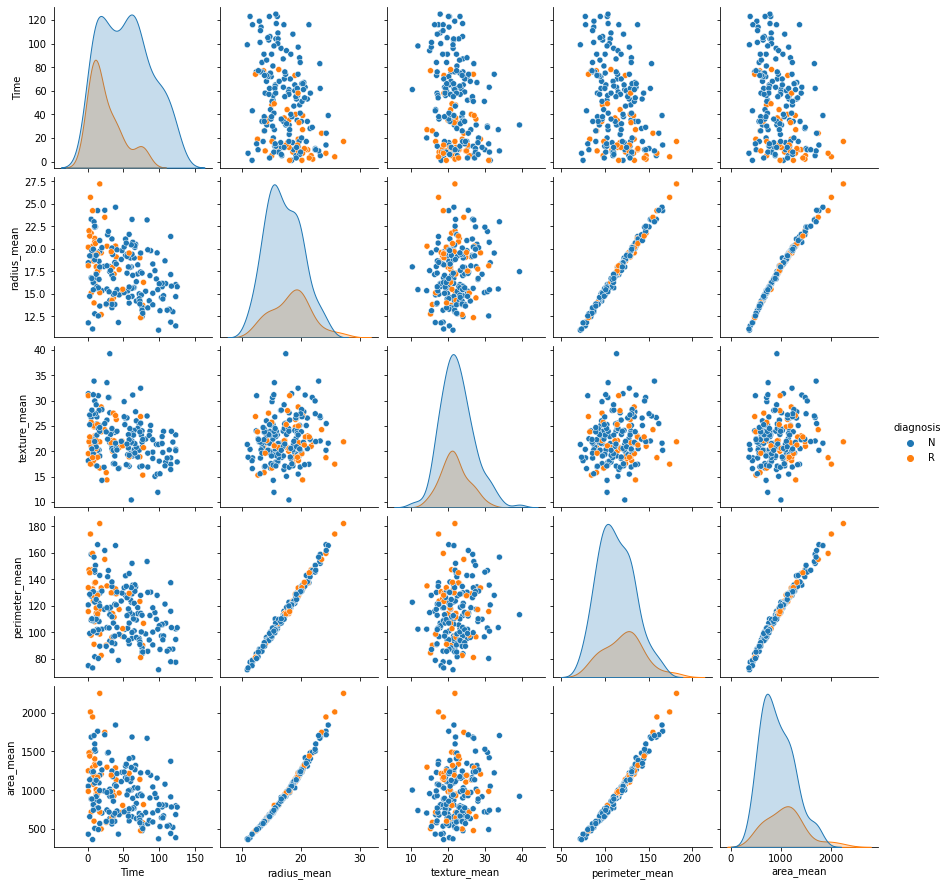

In [12]:
sns.pairplot(BC_data.iloc[:,1:7],hue="diagnosis")

#title = "Marginal distribution against target variable"

### Data Cleaning

In [ ]:
## checking for null values
BC_data.isnull().sum

In [ ]:
#Lymph node status’ is missing in 4 cases i am replacing ? with 9999
BC_data.replace('?', -9999, inplace = True)
BC_data.drop(['id',], 1, inplace=True)

In [ ]:
BC_data

## Feature selection

In [ ]:
BC_data.corr() 


In [ ]:
plt.hist(BC_data['diagnosis'], color ='blue' )
plt.title('Plot_Diagnosis (R=1, N=0)')
plt.show

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(BC_data.corr(), annot = True)

#### Nucleus features vs Diagnosis

In [ ]:
features_mean=list(BC_data.columns[1:11])
# split dataframe into two based on diagnosis
BC_dataN=BC_data[BC_data['diagnosis'] ==0]
BC_dataR=BC_data[BC_data['diagnosis'] ==1]

In [ ]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(8,10), constrained_layout=True)
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(BC_data[features_mean[idx]]) - min(BC_data[features_mean[idx]]))/50
    ax.hist([BC_dataN[features_mean[idx]],BC_dataR[features_mean[idx]]], bins=np.arange(min(BC_data[features_mean[idx]]), max(BC_data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['N','R'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [ ]:
# generate a scatter plot matrix with the "mean columns"

cols = ['diagnosis',
        'Time',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=BC_data[cols], hue ='diagnosis', palette ='rocket')
#ns.pairplot(BC_data.iloc[:,1:7],hue="diagnosis")

almost perfectly linear patternes between the radius, perimeter and area mean , this means there is pressence of multicolinearity between these variables (they are highly linearly related(another set that possibly imply  multicolinearity are the concavity. concave points and compactness

multicolinearity is a problem as it undermines the significance of independent variables and we fix it by removing the highly correlated predictors from the model 
using partial least square regression  or principal component analysis , regression methods that cut the number of predictors to a smaller set of uncorellated components 

In [ ]:
# Generate and visualise the correlation matrix
corr = BC_data.corr().round(2)

#mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# set figure size
f, ax = plt.subplots(figsize =(20,20))

# Define custom colormap
cmap =sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heat nmap
sns.heatmap(corr, mask=mask,cmap=cmap, vmin=1, vmax=1, center=0,
           square=True, linewidth=.5, cbar_kws={"shrink": .5}, annot = True)

plt.tight_layout()

In [ ]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
BC_data = BC_data.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
BC_data = BC_data.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
BC_data = BC_data.drop(cols, axis=1)

# verify remaining columns
BC_data.columns

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = BC_data.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()



In [ ]:
#sns.pairplot(BC_data.iloc[:,1:5],hue="diagnosis")

### Building the model

In [ ]:
# Def X and Y
"""X = np.array(BC_data.as_matrix())
y = np.array(Bc_data.diagnosis.tolist())
BC_data = BC_data.drop('diagnosis', 1)"""

X = np.array(BC_data.drop(['diagnosis'], 1))
y = np.array(BC_data['diagnosis'])

In [ ]:
print(X)
print(y)

### splitting Data set 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )

### Feature Scalling

feature scaling was done to standardization  the data , reason because if a variable in the data ranges from 0 and 100 it will out weigh a variable that ranges from 0 and 1 using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit (X_train, y_train)



In [ ]:
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

In [ ]:
#data = np.array([4,3,3,2,1,2,1,1,2])
#print(classifier.predict(sc.transform([[30,87000]])))

# Synthetic minority sampling technique (SMOTE)
##### This helps to deal with imbalanced dataset

In [ ]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X_train,y_train)

#X_sm.value_counts()
#y_sm.value_counts()
print (y_sm)
print (X_sm)

In [ ]:
pd.Series(y_sm).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Diagnosis', )


### make prediction on the dataset using KNN classifier

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )

In [ ]:
training_accuracy = [] 
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

In [ ]:
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

In [ ]:
"""for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_sm, y_sm)
    # record training set accuracy
    training_accuracy.append(clf.score(X_sm, y_sm))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))"""

In [ ]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### K-NN

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
model1=clf.fit(X_train,y_train)
prediction1=model1.predict(X_test)
cm1= confusion_matrix(y_test,prediction1)
cm1
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

sns.heatmap(cm1,annot=True)
plt.savefig('h.png')


In [ ]:
from sklearn.metrics import accuracy_score
KNN_1 =accuracy_score(y_test,prediction1)
KNN_1

### make prediction on the dataset using Logistics Regression classifier 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model2=lr.fit(X_train,y_train)
prediction2=model2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,prediction2)
cm2

In [ ]:

print(classification_report(y_test, prediction2))
sns.heatmap(cm2,annot=True)
plt.savefig('h.png')


In [ ]:

lr_2 =accuracy_score(y_test,prediction2)
lr_2

### make prediction on the dataset using Support Vector Machine classifier 

In [ ]:
# make predictions on test datasets


SVM = SVC()
SVM.fit(X_train, y_train)
prediction3= SVM.predict(X_test)
cm3= confusion_matrix(y_test,prediction3)
cm3


#print(classification_report(y_test, prediction3))
print(confusion_matrix(y_test, prediction3))


#accuracy_score(y_test,prediction3)

In [ ]:

print(classification_report(y_test, prediction3))
sns.heatmap(cm3,annot=True)
plt.savefig('h.png')


"""TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))"""

In [ ]:
SVM_3 =accuracy_score(y_test,prediction3)
SVM_3

### make prediction on the dataset using Naive Bayes classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

model4=NB.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction3)
cm4

In [ ]:

print(classification_report(y_test, prediction4))
sns.heatmap(cm4,annot=True)
plt.savefig('h.png')

In [ ]:
NB_4 =accuracy_score(y_test,prediction4)
NB_4

In [ ]:
# comparing k-NN and logistics regression 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))
print(classification_report(y_test, prediction2))

In [ ]:
# comparing NAIVE BAYES and SVM
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))
print(classification_report(y_test, prediction4))

### k-fold cross validation

In [ ]:
# kfold is a resampling technique that evaluate the machine learning
#Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting 
#in a predictive model, particularly in a case where the amount of data may be limited

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression




In [ ]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('lr', LogisticRegression()))
models.append(('SVM', SVC()))

In [ ]:
# cross evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10,  shuffle = False)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

# PLOTTING ROC CURVE

In [ ]:
# ROC curve
#fpr, tpr, t = roc_curve(y_test, y_score)
#plot_roc()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
Predictions= LogitModel.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, logitModel.predict(X_test)[:, 1])

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

### algorithm comparison

In [ ]:
#boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
### Model Performance plot

In [ ]:

models_metrics = {'KNN': [0.982, 0.990, 0.962,0.989], 
                 'NB': [0.974, 0.981, 0.948,0.987],
                 'LR' : [0.974,0.976,0.953,0.987],
                 'SVM' : [0.979,0.985,0.958,0.678]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' , 3: 'specificity'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

#Thank you all ! Merci à tous ! :)

# for auc use roc_auc_score 

In [ ]:
logit_roc_auc1 = roc_auc_score(y_test, logmodel.predict(X_test))

## plot ROC curve

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label = 'Logistics Regression(sensitivity = %0.3f)' % logit_roc_auc1)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 0.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc ="lower right")
plt.savefig('Log_ROC')
plt.show()

### Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

In [ ]:
accuracy_score(y_test,prediction2)

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

In [ ]:
accuracy_score(y_test, prediction3)

In [ ]:
# Random forest  And K-NN
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))
print(classification_report(y_test, prediction4))

In [ ]:
# comparing logistics regression and decision treesd
print(classification_report(y_test, prediction1))

print(classification_report(y_test, prediction2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
ls.append(('lr', LogisticRegression()))
models.append(('SVM', SVC()))
lr

In [ ]:
# kfold is a resampling technique that evaluate the machine learning
#Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting 
#in a predictive model, particularly in a case where the amount of data may be limited

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# cross evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, random_state=40)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# make predictions on test datasets

SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

### Linear Regression

In [ ]:

plt.show()

# Random Forest

# Naive bayes